## Machine Learning Final Project: Fashion MNIST

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import struct
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


In [31]:
# Load the csv files
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [32]:
# Helper functions

def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows * cols)
    return images

def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


In [33]:
# Print the shape of the training and test images

X_train = load_images("train-images-idx3-ubyte")
y_train = load_labels("train-labels-idx1-ubyte")

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

X_test = load_images("t10k-images-idx3-ubyte")
y_test = load_labels("t10k-labels-idx1-ubyte")

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


In [34]:
# Create a dictionary to map labels to names

label2name = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

print(label2name)
print(f"Total number of classes: {len(label2name)}")

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
Total number of classes: 10


# Visualization 

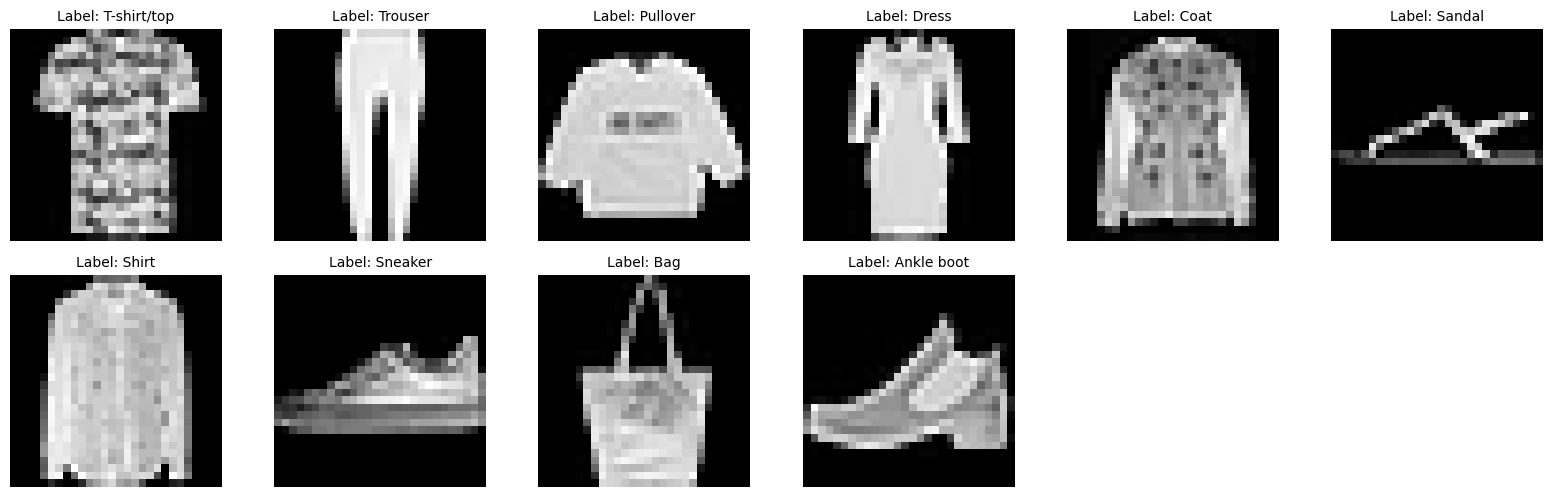

In [35]:
# Visualize the labels

unique_labels = sorted(train_df['label'].unique())
plt.figure(figsize=(16, 10))

for i, label in enumerate(unique_labels):
    sample = train_df[train_df['label'] == label].iloc[0, 1:].values.reshape(28, 28)

    plt.subplot(4, 6, i + 1)
    plt.imshow(sample, cmap=plt.cm.gray)
    plt.title(f"Label: {label2name[label]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

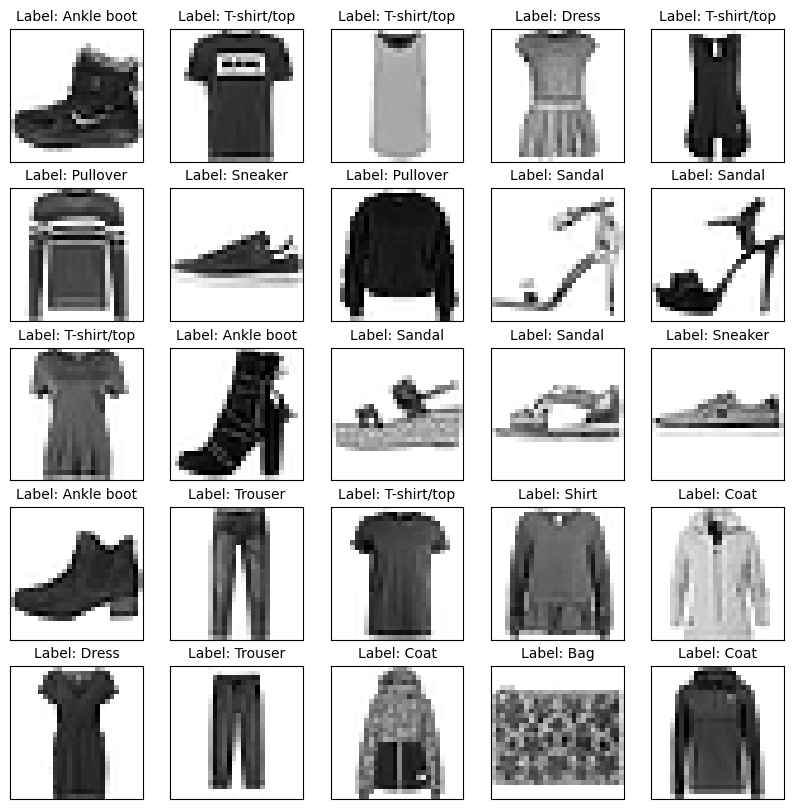

In [36]:
# Visualize the first 25 images

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Label: {label2name[y_train[i]]}", fontsize=10)
    
plt.show()

# Pre-Processing

In [37]:
# Separate features and labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [38]:
# Train and test split the data

def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix
            
            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [39]:
# Set the train and test sets to 10,000 and 2,000 
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]
X_test_small = X_test[:2000]
y_test_small = y_test[:2000]


In [40]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=300, solver='saga', multi_class='multinomial')
model.fit(X_train_small, y_train_small)

# Make predictions
y_pred_lr = model.predict(X_test_small)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [41]:
# Evaluate the model

print("Logistic Regression Evaluation")
print(classification_report(y_test_small, y_pred_lr))

print(f"Accuracy: {model.score(X_test_small, y_test_small):.4f}")


Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       195
           1       0.99      0.96      0.97       189
           2       0.74      0.71      0.73       205
           3       0.84      0.85      0.85       200
           4       0.71      0.73      0.72       199
           5       0.94      0.87      0.90       202
           6       0.60      0.59      0.59       213
           7       0.86      0.91      0.89       204
           8       0.93      0.94      0.93       188
           9       0.91      0.94      0.93       205

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

Accuracy: 0.8275


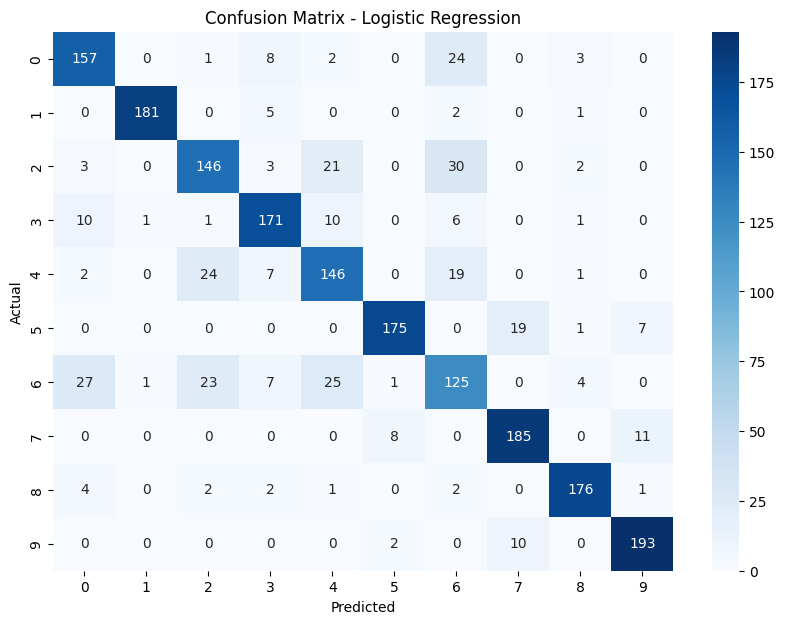

In [42]:
# Confusion Matrix for Logistic Regression

cm = confusion_matrix(y_test_small, y_pred_lr)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [43]:
# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_small, y_train_small)

# Make predictions
y_pred_nb = nb_model.predict(X_test_small)

# Evaluate the model
print("Naive Bayes Classification Evaluation")
print(classification_report(y_test_small, y_pred_nb))

print(f"Accuracy: {accuracy_score(y_test_small, y_pred_nb):.4f}")


Naive Bayes Classification Evaluation
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       195
           1       0.99      0.89      0.94       189
           2       0.57      0.61      0.59       205
           3       0.67      0.92      0.78       200
           4       0.44      0.55      0.49       199
           5       0.59      0.16      0.25       202
           6       0.35      0.19      0.25       213
           7       0.60      0.92      0.73       204
           8       0.92      0.82      0.87       188
           9       0.69      0.80      0.74       205

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.64      2000
weighted avg       0.65      0.66      0.63      2000

Accuracy: 0.6595


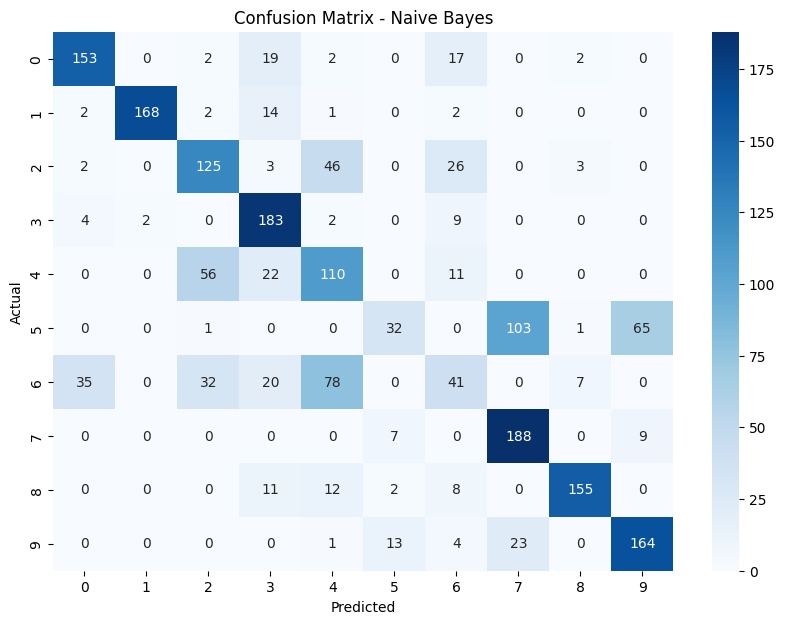

In [44]:
cm = confusion_matrix(y_test_small, y_pred_nb)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
# Train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train_small, y_train_small)

# Make predictions
y_pred_gnb = gnb_model.predict(X_test_small)

# Evaluate the model
print("Gaussian Naive Bayes Evaluation")
print(classification_report(y_test_small, y_pred_gnb))

print(f"Accuracy: {accuracy_score(y_test_small, y_pred_gnb):.4f}")


Gaussian Naive Bayes Evaluation
              precision    recall  f1-score   support

           0       0.88      0.52      0.66       195
           1       0.47      0.96      0.63       189
           2       0.59      0.37      0.45       205
           3       0.27      0.24      0.25       200
           4       0.39      0.75      0.51       199
           5       0.86      0.30      0.44       202
           6       0.29      0.05      0.08       213
           7       0.48      0.97      0.64       204
           8       0.82      0.69      0.75       188
           9       0.90      0.55      0.68       205

    accuracy                           0.53      2000
   macro avg       0.59      0.54      0.51      2000
weighted avg       0.59      0.53      0.50      2000

Accuracy: 0.5330
